# ☎️Telefonia CallMeMaybe


## 📌 Recursos del análisis

- **Dashboard interactivo: comportamiento de llamadas**  
  [**Ver dashboard**](https://public.tableau.com/views/Distribucindellamadasportipoyplan/Dashboardppal?:language=es-ES&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)

- **Informe de análisis: resumen ejecutivo y resultados**  
 [**Informe de Analisis**](https://drive.google.com/file/d/1ct9DCGbHSTi_ke7S-kFG5O0Dza7I1EOI/view?usp=sharing)
 ___

## 🏢 Contexto Empresarial
CallMeMaybe es un servicio de telefonía virtual que facilita la comunicación empresarial mediante operadores humanos. En su esfuerzo por mejorar la eficiencia operativa, la compañía está desarrollando una funcionalidad que permitirá a los supervisores **identificar operadores menos eficaces** dentro del sistema.

La empresa ya ha definido los patrones que caracterizan la ineficacia operativa:

- **Alto volumen de llamadas entrantes perdidas** (internas y externas)
- **Tiempos de espera prolongados** en la atención de llamadas entrantes
- **Bajo número de llamadas salientes**, en casos donde el operador tiene esa responsabilidad
___

## 🎯Objetivo de Analisis
El objetivo de este análisis es aplicar estos criterios para **detectar operadores ineficaces**, validar hipótesis estadísticas sobre su comportamiento y generar visualizaciones estratégicas que faciliten la toma de decisiones operativas.
______

## 🗂️ Descripción del Dataset
### 💼telecom_dataset_us.csv
El dataset comprimido `telecom_dataset_us.csv` contiene las siguientes columnas:

- `user_id`: ID de cliente.
- `date`: fecha en la que se recuperaron las estadísticas.
- `direction`: `out` para saliente, `in` para entrante.
- `internal`: si la llamada fue interna (entre los operadores de un cliente o clienta)
- `operator_id`: ID del operador
- `is_missed_call`: si fue una llamada perdida
- `calls_count`: número de llamadas
- `call_duration`: duración de la llamada (sin incluir el tiempo de espera)
- `total_call_duration`: duración de la llamada (incluido el tiempo de espera)
____
### 💼telecom_clients_us.csv
El conjunto de datos `telecom_clients_us.csv` tiene las siguientes columnas:

- `user_id`: ID de usuario/a
- `tariff_plan`: tarifa actual de la clientela
- `date_start`: fecha de registro de la clientela

____

# 📥 1. Carga y exploración inicial de datos

## ⏳Carga de Librerias


In [32]:
# Importamos librerias y modlulos necesarios para EDA y procesmaiento de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [33]:
# Bloque try-except 
# Bloque defensivo para carga de datos. Se validan errores comunes y se confirma éxito.

try:
    # Cargamos el dataset desde un archivo CSV
    registros = pd.read_csv('telecom_dataset_us.csv')
    usuarios = pd.read_csv('telecom_clients_us.csv')
except FileNotFoundError:
    print("Error: El archivo no se encuentra.")
except pd.errors.EmptyDataError:
    print("Error: El archivo está vacío.")
except pd.errors.ParserError:
    print("Error: Error al parsear el archivo.")
except Exception as e:
    print(f"Error inesperado: {e}")
else:
    print("Datos cargados exitosamente.")


Datos cargados exitosamente.


>*Se implementa un bloque try-except para carga de datos con manejo explícito de errores comunes (archivo no encontrado, archivo vacío, error de parseo). Esta estrategia permite prevenir interrupciones, clasificar fallos y confirmar éxito de forma trazable.*

# 📝 2. Preprocesamiento de datos

___
## 📋registros

In [34]:
# inspeccion de df registros
print(registros.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB
None


In [35]:
# convertimos nombres de columnas a minusculas y sin espacio inciales y finales
registros.columns = registros.columns.str.strip().str.lower()

# Convertimos las columnas de fecha a tipo datetime sin hora
registros['date'] = pd.to_datetime(registros['date']).dt.date

# convertimos direction a categorial
registros['direction'] = registros['direction'].astype('category')

# Convertimos internal a categorical
registros['internal'] = registros['internal'].astype('category')

# Convertimos is_missed_call a categorical
registros['is_missed_call'] = registros['is_missed_call'].astype('category')

In [36]:
registros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   user_id              53902 non-null  int64   
 1   date                 53902 non-null  object  
 2   direction            53902 non-null  category
 3   internal             53785 non-null  category
 4   operator_id          45730 non-null  float64 
 5   is_missed_call       53902 non-null  category
 6   calls_count          53902 non-null  int64   
 7   call_duration        53902 non-null  int64   
 8   total_call_duration  53902 non-null  int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 2.6+ MB


In [37]:
registros.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04,in,False,NaN,True,2,0,4
1,166377,2019-08-05,out,True,880022.0,True,3,0,5
2,166377,2019-08-05,out,True,880020.0,True,1,0,1
3,166377,2019-08-05,out,True,880020.0,False,1,10,18
4,166377,2019-08-05,out,False,880022.0,True,3,0,25


___
🧼 Limpieza y tipificación inicial

Se realizó una limpieza estructural mínima para asegurar trazabilidad y compatibilidad con el análisis posterior.

- Se estandarizaron los nombres de columnas (`lowercase`, sin espacios).
- Se convirtió la columna `date` a tipo `datetime` sin hora para facilitar agrupamientos temporales.
- Las columnas `direction`, `internal` e `is_missed_call` fueron tipificadas como `category` para reducir uso de memoria y mejorar eficiencia en agrupamientos.

Esta etapa no altera el contenido del dataset, pero garantiza que las variables clave estén correctamente tipificadas para análisis posteriores.
____

### ⛔Manejo de valores nulos

#### 🗣️Columna 'operator_id'

In [38]:
# Contamos valores nulos de columna operator_id
print("Llamadas sin operator_id: ", registros['operator_id'].isnull().sum())

Llamadas sin operator_id:  8172


In [39]:
# Extraemos filas sin operator_id de df original y las guardamos en un nuevo df
registros_sin_operator = registros[registros['operator_id'].isnull()]

# Mostramos las primeras filas del nuevo df para inspección
registros_sin_operator.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04,in,False,NaN,True,2,0,4
7,166377,2019-08-05,in,False,NaN,True,6,0,35
9,166377,2019-08-06,in,False,NaN,True,4,0,62
17,166377,2019-08-07,in,False,NaN,True,2,0,24
27,166377,2019-08-12,in,False,NaN,True,2,0,34


>___
>*Se ha aislado el subconjunto de registros sin `operator_id`, ya que no permiten evaluar la eficiencia individual de los operadores. Este grupo será analizado por separado al final del proyecto como hallazgo complementario. Para el análisis principal, se trabajará únicamente con registros que tengan operador asignado, garantizando trazabilidad y relevancia en las métricas.*
>___


In [40]:
# Nuevo df excluyendo filas sin operator_id
registros_filtrado = registros[registros['operator_id'].notnull()]

# Verificamos que no queden nulos en operator_id
print("Llamadas sin operator_id en df filtrado: ", registros_filtrado['operator_id'].isnull().sum())
print()

# Revisamos info del df filtrado
registros_filtrado.info()

Llamadas sin operator_id en df filtrado:  0

<class 'pandas.core.frame.DataFrame'>
Index: 45730 entries, 1 to 53900
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   user_id              45730 non-null  int64   
 1   date                 45730 non-null  object  
 2   direction            45730 non-null  category
 3   internal             45670 non-null  category
 4   operator_id          45730 non-null  float64 
 5   is_missed_call       45730 non-null  category
 6   calls_count          45730 non-null  int64   
 7   call_duration        45730 non-null  int64   
 8   total_call_duration  45730 non-null  int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 2.6+ MB



#### 📞Columna 'internal'

In [41]:
# Conteo de NaN en internal
print(
    f"Llamadas sin internal: {registros_filtrado['internal'].isnull().sum()} de {len(registros_filtrado)} registros totales\n"
    f"Equivalente a: {registros_filtrado['internal'].isnull().mean()*100:.2f}% del total"
)

# eliminamos filas con NaN en internal
registros_filtrado = registros_filtrado[registros_filtrado['internal'].notnull()]

# Verificamos que no queden nulos en internal
print("Llamadas sin internal en df filtrado: ", registros_filtrado['internal'].isnull().sum())

registros_filtrado.info()

Llamadas sin internal: 60 de 45730 registros totales
Equivalente a: 0.13% del total
Llamadas sin internal en df filtrado:  0
<class 'pandas.core.frame.DataFrame'>
Index: 45670 entries, 1 to 53900
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   user_id              45670 non-null  int64   
 1   date                 45670 non-null  object  
 2   direction            45670 non-null  category
 3   internal             45670 non-null  category
 4   operator_id          45670 non-null  float64 
 5   is_missed_call       45670 non-null  category
 6   calls_count          45670 non-null  int64   
 7   call_duration        45670 non-null  int64   
 8   total_call_duration  45670 non-null  int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 2.6+ MB


___
### 🧼 Preprocesamiento del dataset `registros`

Se realizó una limpieza estructural y tipificación defensiva del dataset principal para garantizar trazabilidad y compatibilidad con el análisis de eficiencia operativa.

🔧 **Transformaciones aplicadas:**

- Se estandarizaron los nombres de columnas (`lowercase`, sin espacios).
- La columna `date` fue convertida a tipo `datetime` sin hora para facilitar agrupamientos temporales.
- Las columnas `direction`, `internal` e `is_missed_call` fueron tipificadas como `category` para optimizar memoria y mejorar eficiencia en agrupamientos.

🧪 **Tratamiento de valores nulos:**

- Se identificaron **8,172 registros sin `operator_id`**, lo cual impide evaluar la eficiencia individual de los operadores.
  - Estos registros fueron **aislados en un DataFrame complementario** (`registros_sin_operator`) para análisis posterior.
- Se detectaron **60 registros con `internal` nulo**, lo que representa solo el 0.13% del total.
  - Dado que esta variable es clave para clasificar el tipo de llamada, se decidió **eliminar estos registros** para evitar ambigüedades en el análisis.

📦 **Resultado:**
El análisis principal se realizará sobre el subconjunto `registros_filtrado`, que contiene únicamente llamadas con operador asignado y clasificación completa del tipo de llamada. Esta estrategia garantiza que las métricas de eficiencia estén basadas en datos completos y relevantes, sin sesgos por registros incompletos.

___

## 👥usuarios

In [42]:
# Inspeccion de df usuarios
usuarios.info()

# mostramos primeras filas de df usuarios
usuarios.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


In [43]:
# Hacemos minusculas las columnas y quitamos espacios en blanco iniciales y finales
usuarios.columns = usuarios.columns.str.strip().str.lower()

# convertimos date_start a tipo datetime sin hora
usuarios['date_start'] = pd.to_datetime(usuarios['date_start']).dt.date

# vemos tipos de plan en usuarios
print("Tipos de planes:", usuarios['tariff_plan'].value_counts())

print()
# convertimos tariff_plan a categorial
usuarios['tariff_plan'] = usuarios['tariff_plan'].astype('category')

usuarios.info()

Tipos de planes: tariff_plan
C    395
B    261
A     76
Name: count, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   user_id      732 non-null    int64   
 1   tariff_plan  732 non-null    category
 2   date_start   732 non-null    object  
dtypes: category(1), int64(1), object(1)
memory usage: 12.4+ KB


### 🧼 Preprocesamiento del dataset `usuarios`

Se realizó una limpieza estructural mínima para asegurar compatibilidad con el análisis principal:

- Se estandarizaron los nombres de columnas (`lowercase`, sin espacios).
- La columna `date_start` fue convertida a tipo `datetime` para facilitar análisis temporal.
- La columna `tariff_plan` fue tipificada como `category`, dado que contiene solo tres niveles (`A`, `B`, `C`).

No se detectaron valores nulos, por lo que no fue necesario aplicar imputación ni filtrado. Este dataset servirá para enriquecer el análisis con información contextual sobre los clientes.
____

# 🔎 3. Análisis exploratorio de datos descriptivo(EDA)

In [44]:
# unimos ambos datasets por user_id como cmm(CallMeMaybe)
cmm = pd.merge(registros_filtrado, usuarios, on='user_id', how='left')

# vemos info del df combinado
cmm.info()

# Vemos primeras filas del df combinado
cmm.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45670 entries, 0 to 45669
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   user_id              45670 non-null  int64   
 1   date                 45670 non-null  object  
 2   direction            45670 non-null  category
 3   internal             45670 non-null  category
 4   operator_id          45670 non-null  float64 
 5   is_missed_call       45670 non-null  category
 6   calls_count          45670 non-null  int64   
 7   call_duration        45670 non-null  int64   
 8   total_call_duration  45670 non-null  int64   
 9   tariff_plan          45670 non-null  category
 10  date_start           45670 non-null  object  
dtypes: category(4), float64(1), int64(4), object(2)
memory usage: 2.6+ MB


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start
0,166377,2019-08-05,out,True,880022.0,True,3,0,5,B,2019-08-01
1,166377,2019-08-05,out,True,880020.0,True,1,0,1,B,2019-08-01
2,166377,2019-08-05,out,True,880020.0,False,1,10,18,B,2019-08-01
3,166377,2019-08-05,out,False,880022.0,True,3,0,25,B,2019-08-01
4,166377,2019-08-05,out,False,880020.0,False,2,3,29,B,2019-08-01


##  🧾 Reordenamiento y renombramiento de columnas

In [45]:
# Renombramiento de columnas para mayor claridad
cmm.rename(columns={
    'user_id': 'client_id',
    'date': 'call_date',
    'tariff_plan': 'plan',
    'date_start': 'client_since',
    'is_missed_call': 'missed_call',
    'calls_count': 'call_count',
    'call_duration': 'talk_time',
    'total_call_duration': 'total_time'
}, inplace=True)

# columna tiempo de espera
cmm['wait_time'] = cmm['total_time'] - cmm['talk_time']

# Reordenamiento lógico de columnas
cmm = cmm[[
    'client_id', 'plan', 'client_since',
    'call_date', 'direction', 'internal', 'operator_id',
    'missed_call', 'call_count', 'talk_time', 'wait_time'
]]

# Cambio de tipos de datos
cmm['client_since'] = pd.to_datetime(cmm['client_since'])
cmm['call_date'] = pd.to_datetime(cmm['call_date'])
cmm['operator_id'] = cmm['operator_id'].astype(int)

print()
# info del df reordenado y renombrado
cmm.info()

print()
# Vemos primeras filas del df reordenado y renombrado
cmm.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45670 entries, 0 to 45669
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   client_id     45670 non-null  int64         
 1   plan          45670 non-null  category      
 2   client_since  45670 non-null  datetime64[ns]
 3   call_date     45670 non-null  datetime64[ns]
 4   direction     45670 non-null  category      
 5   internal      45670 non-null  category      
 6   operator_id   45670 non-null  int64         
 7   missed_call   45670 non-null  category      
 8   call_count    45670 non-null  int64         
 9   talk_time     45670 non-null  int64         
 10  wait_time     45670 non-null  int64         
dtypes: category(4), datetime64[ns](2), int64(5)
memory usage: 2.6 MB



,client_id,plan,client_since,call_date,direction,internal,operator_id,missed_call,call_count,talk_time,wait_time
0,166377,B,2019-08-01,2019-08-05,out,True,880022,True,3,0,5
1,166377,B,2019-08-01,2019-08-05,out,True,880020,True,1,0,1
2,166377,B,2019-08-01,2019-08-05,out,True,880020,False,1,10,8
3,166377,B,2019-08-01,2019-08-05,out,False,880022,True,3,0,25
4,166377,B,2019-08-01,2019-08-05,out,False,880020,False,2,3,26


___
### 🧾 Consolidación final del dataset `cmm`

Se realizó un proceso de renombramiento, reordenamiento y tipificación de columnas para mejorar la legibilidad semántica y facilitar el análisis temático. Las variables fueron agrupadas en bloques lógicos (cliente, llamada, resultado) y se creó una nueva columna `wait_time`, calculada como la diferencia entre `total_time` y `talk_time`.

Las columnas `client_since` y `call_date` fueron convertidas a tipo `datetime64[ns]` para permitir agrupamientos cronológicos y análisis temporal. La columna `operator_id` fue convertida a `int64`, reforzando su semántica como identificador único.

El DataFrame resultante (`cmm`) contiene 45,670 registros limpios, trazables y listos para iniciar el análisis exploratorio.
___


In [46]:
# generamos excel de cmm para visualizar
#cmm.to_excel('cmm_limpio.xlsx', index=False)

## 📊Distribuciones Generales

direction
out    0.694482
in     0.305518
Name: proportion, dtype: float64


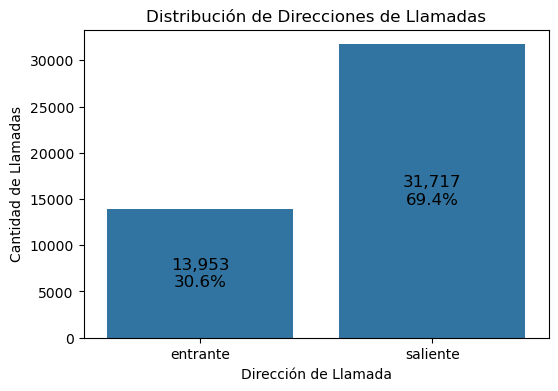

In [47]:
# Vemos las distribuciones generales
print(cmm['direction'].value_counts(normalize=True))

graph_df = cmm.copy()
graph_df['direction'] = graph_df['direction'].cat.rename_categories({'in':'entrante', 'out':'saliente'})

# Grafico de barras
plt.figure(figsize=(6,4))
sns.countplot(data=graph_df, x='direction')
plt.title('Distribución de Direcciones de Llamadas')
plt.xlabel('Dirección de Llamada')
plt.ylabel('Cantidad de Llamadas')

# Agregamos porcentajes encima de las barras
total_calls = len(graph_df)
for p in plt.gca().patches:
    height = p.get_height()
    porcentaje = (height/total_calls)*100
    plt.gca().annotate(f'{int(height):,}\n{porcentaje:.1f}%', 
                       (p.get_x() + p.get_width() / 2, height/2), 
                       ha='center', va='center', color='black', fontsize=12)

plt.show()

*📊 La mayoría de las llamadas son salientes (69.4%), lo que indica un comportamiento operativo predominantemente proactivo. Solo el 30.6% de las llamadas fueron entrantes, lo que sugiere que la empresa realiza más contactos que los que recibe.*
___

internal
False    0.872805
True     0.127195
Name: proportion, dtype: float64


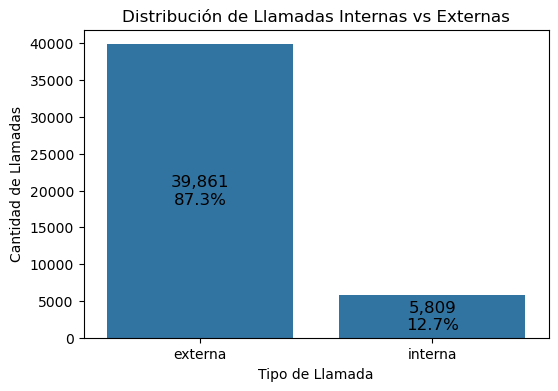

In [48]:
print(cmm['internal'].value_counts(normalize=True))

graph_df['internal'] = graph_df['internal'].cat.rename_categories({True:'interna', False:'externa'})

# Grafico de barras para llamadas internas vs externas
plt.figure(figsize=(6,4))
sns.countplot(data=graph_df, x='internal')
plt.title('Distribución de Llamadas Internas vs Externas')
plt.xlabel('Tipo de Llamada')
plt.ylabel('Cantidad de Llamadas')

# Agregamos porcentajes encima de las barras
total_calls = len(graph_df)
for p in plt.gca().patches:
    height = p.get_height()
    porcentaje = (height/total_calls)*100
    plt.gca().annotate(f'{int(height):,}\n{porcentaje:.1f}%', 
                       (p.get_x() + p.get_width() / 2, height/2), 
                       ha='center', va='center', color='black', fontsize=12)

plt.show()


*📊 La mayoría de las llamadas fueron externas (87.3%), lo que confirma que el flujo de comunicación está centrado en la interacción con clientes. Las llamadas internas representan solo el 12.7%, lo que sugiere que la operación está orientada principalmente hacia el exterior.*
___

Total de llamadas: 45670
missed_call
False    0.660236
True     0.339764
Name: proportion, dtype: float64


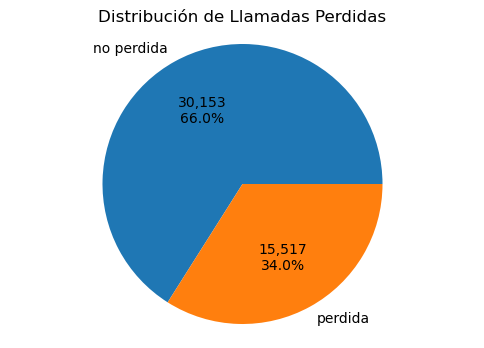

In [49]:
# Total de llamadas
print("Total de llamadas:", cmm.shape[0])

print(cmm['missed_call'].value_counts(normalize=True))

graph_df['missed_call'] = graph_df['missed_call'].cat.rename_categories({True:'perdida', False:'no perdida'})

# Funcion para mostrar numeor y %
def autopct(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return f"{absolute:,}\n{pct:.1f}%"

# Grafico de pastel
plt.figure(figsize=(6,4))
plt.pie(graph_df['missed_call'].value_counts(), labels=graph_df['missed_call'].value_counts().index, autopct=lambda pct: autopct(pct, graph_df['missed_call'].value_counts()))
plt.title('Distribución de Llamadas Perdidas')
plt.axis('equal')
plt.show()

*🥧 De las 45,670 llamadas registradas, el 34.0% fueron perdidas y el 66.0% fueron atendidas. Esta proporción indica que, aunque la mayoría de las llamadas fueron gestionadas correctamente, una de cada tres no recibió atención, lo que podría impactar la experiencia del cliente.*
___

plan
C    0.357543
B    0.348369
A    0.294088
Name: proportion, dtype: float64


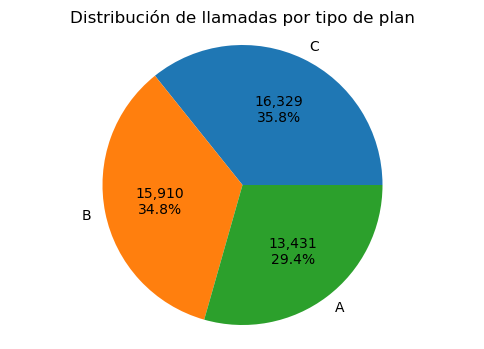

In [50]:
print(cmm['plan'].value_counts(normalize=True))

# Graficamos pie para planes
plt.figure(figsize=(6,4))
values = graph_df['plan'].value_counts()
plt.pie(values, labels=values.index, autopct=lambda pct: autopct(pct, values))
plt.title('Distribución de llamadas por tipo de plan')
plt.axis('equal')
plt.show()

Clientes totales: 290
Operadores unicos: 1092
  plan  client_id
0    A         32
1    B        101
2    C        157


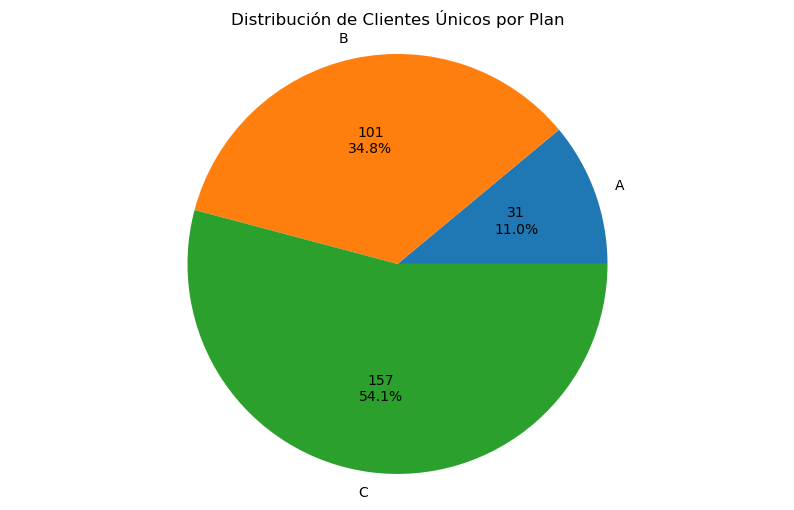

In [51]:
print(f"Clientes totales: {cmm['client_id'].nunique()}")
# Total de operadores unicos
print("Operadores unicos:", cmm['operator_id'].nunique())

# Cantidad de clientes por plan
client_per_plan = cmm.groupby('plan', observed=True)['client_id'].nunique().reset_index()
print(client_per_plan)

# Grafico de pastel distribucion de planes en clientes unicos
plt.figure(figsize=(10,6))
plt.pie(client_per_plan['client_id'], labels=client_per_plan['plan'], autopct=lambda pct: autopct(pct, client_per_plan['client_id']))
plt.title('Distribución de Clientes Únicos por Plan')
plt.axis('equal')
plt.show()


*🥧 Aunque los tres planes generan volúmenes de llamadas similares (Plan C: 35.8%, B: 34.8%, A: 29.4%), la base de clientes está distribuida de forma desigual: Plan C concentra el 54.1% de los clientes únicos, seguido por B con 34.8% y A con solo 11%. Esto sugiere que los clientes del Plan A realizan más llamadas por persona, mientras que los del Plan C, aunque más numerosos, tienen una carga operativa más distribuida.*
____

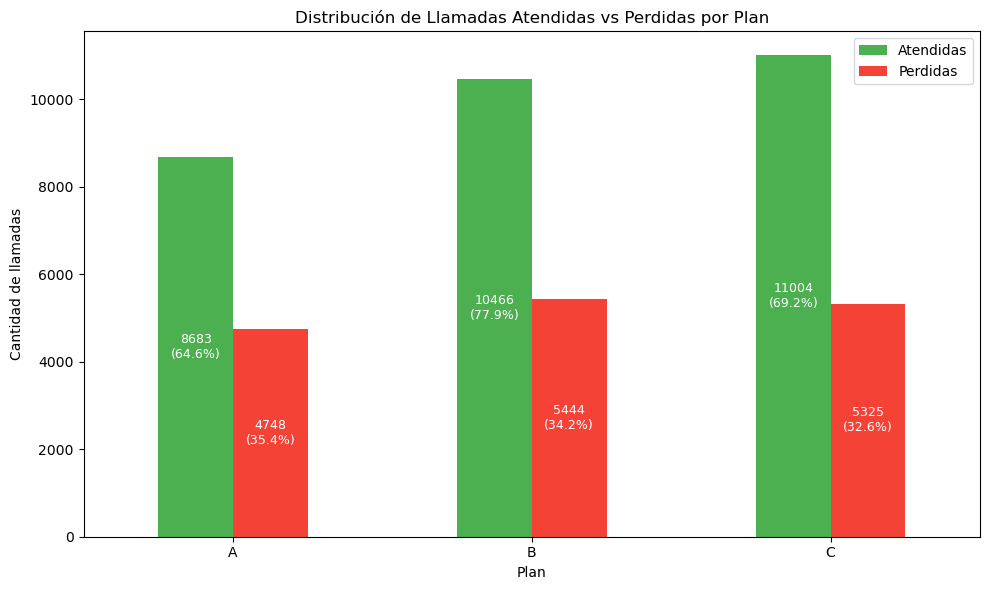

In [52]:
# Grafico de barras con llamadas perdidas y no perdidas por plan
# Agrupamos por plan y estado de llamada
llamadas_por_plan = cmm.groupby(['plan', 'missed_call'], observed=True).size().unstack(fill_value=0)

# Visualización
ax = llamadas_por_plan.plot(kind='bar', stacked=False, figsize=(10,6), color=['#4CAF50', '#F44336'])
plt.title('Distribución de Llamadas Atendidas vs Perdidas por Plan')
plt.xlabel('Plan')
plt.ylabel('Cantidad de llamadas')
plt.legend(['Atendidas', 'Perdidas'])
plt.xticks(rotation=0)

# Agregar etiquetas con número y porcentaje
for container in ax.containers:
    total_per_plan = llamadas_por_plan.sum(axis=1)
    for bar in container:
        height = bar.get_height()
        plan_index = int(bar.get_x() + bar.get_width() / 2)
        plan_label = bar.get_x() + bar.get_width() / 2
        plan = bar.get_label()
        plan_name = bar.get_x()
        plan_total = total_per_plan.iloc[int(bar.get_x())]
        pct = height / plan_total * 100
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height / 2,
            f"{int(height)}\n({pct:.1f}%)",
            ha='center',
            va='center',
            fontsize=9,
            color='white'
        )

plt.tight_layout()
plt.show()


*📊 Los tres planes presentan volúmenes similares de llamadas, con un crecimiento progresivo de A a C. En todos los casos, la relación entre llamadas atendidas y perdidas se mantiene cercana a 1 llamada perdida por cada 2 atendidas. Además, se observa una ligera mejora en la tasa de atención conforme aumenta el volumen, siendo el Plan C el más eficiente en términos relativos.*
____

## ❗Valores Atipicos

count    13953.000000
mean        97.578084
std        185.023660
min          0.000000
25%         17.000000
50%         38.000000
75%         98.000000
90%        229.000000
95%        378.000000
99%        929.440000
max       3998.000000
Name: wait_time, dtype: float64


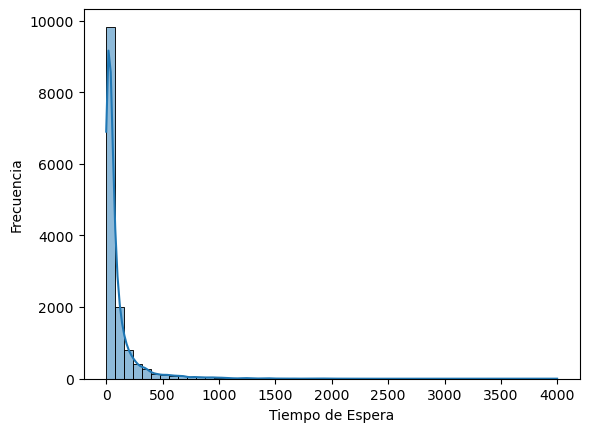

In [53]:
# Estadisticas para tiempo de espera
llamadas_entrantes = cmm[cmm['direction']=='in']
print(llamadas_entrantes['wait_time'].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))

# Grafico de caja de tiempo de espera
sns.histplot(llamadas_entrantes['wait_time'], bins=50, kde=True)
plt.xlabel('Tiempo de Espera')
plt.ylabel('Frecuencia')
plt.show()


count     30153.000000
mean       1530.326502
std        4862.861971
min           0.000000
5%           15.000000
25%         110.000000
50%         446.000000
75%        1425.000000
90%        3367.600000
95%        5551.000000
99%       13618.000000
max      144395.000000
Name: talk_time, dtype: float64


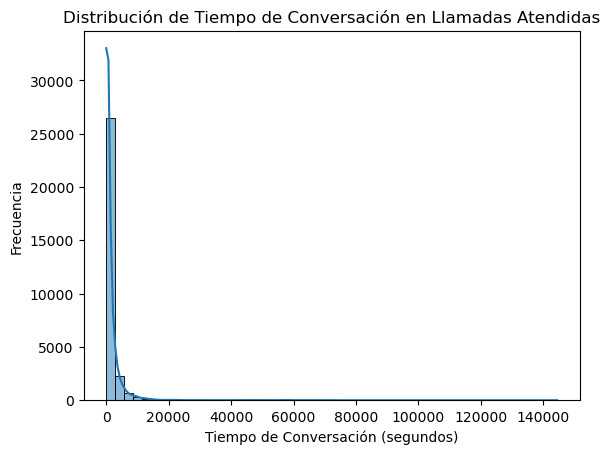

In [54]:
# Estadisticas para talk_time en llamadas contestadas
llamadas_atendidas = cmm[cmm['missed_call']==False]

# Estadisticas descriptivas
print(llamadas_atendidas['talk_time'].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))

# Histograma
sns.histplot(llamadas_atendidas['talk_time'], bins=50, kde=True)
plt.title('Distribución de Tiempo de Conversación en Llamadas Atendidas')
plt.xlabel('Tiempo de Conversación (segundos)')
plt.ylabel('Frecuencia')
plt.show()

*📊 Se analizó la distribución de `talk_time` en llamadas atendidas para identificar valores atípicos que pudieran distorsionar métricas agregadas. La mediana fue de 446 segundos (~7.4 minutos), mientras que el percentil 95 alcanzó los 5551 segundos (~92 minutos), y el percentil 99 superó los 13600 segundos (~3.8 horas). El valor máximo registrado fue de 144395 segundos (~40 horas), lo que evidencia la presencia de casos extremos. Aunque esta métrica no forma parte directa de los criterios de eficiencia definidos, su revisión permite anticipar posibles sesgos en análisis complementarios o narrativas operativas.*
___

count    882.000000
mean      35.960317
std       41.965280
min        1.000000
5%         1.000000
25%        5.000000
50%       21.000000
75%       49.750000
90%       92.000000
95%      124.800000
99%      186.190000
max      246.000000
dtype: float64


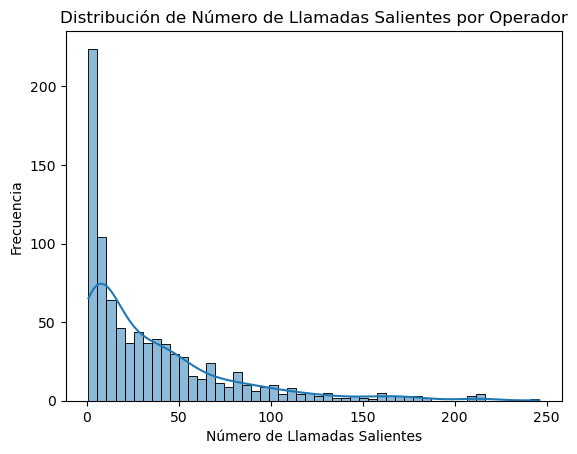

In [55]:
# llamadas salientes
llamadas_salientes = cmm[cmm['direction']=='out']

# Numero de llamadas por operador
volumen_saliente_operador = llamadas_salientes.groupby('operator_id').size()

print(volumen_saliente_operador.describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))

# Histograma
sns.histplot(volumen_saliente_operador, bins=50, kde=True)
plt.title('Distribución de Número de Llamadas Salientes por Operador')
plt.xlabel('Número de Llamadas Salientes')
plt.ylabel('Frecuencia')
plt.show()

*📊 Aunque el percentil 25 (5 llamadas) podría considerarse un umbral defensivo para detectar baja actividad saliente, el contexto operativo de CallMeMaybe — donde el 69.4% de las llamadas son salientes — sugiere que la mayoría de los operadores tienen funciones proactivas. Por ello, se ajustó el umbral al percentil 50 (21 llamadas) para reflejar mejor las expectativas del negocio y detectar ineficiencia de forma más precisa.*
___

# ⚡4. Criterios de Eficiencia
Acorde a la informacion proporcionada tenemos que traducir los criterios:
- **Alto volumen de llamadas entrantes perdidas** (internas y externas)
- **Tiempos de espera prolongados** en la atención de llamadas entrantes
- **Bajo número de llamadas salientes**, en casos donde el operador tiene esa responsabilidad

A umbrales reproducibles para determinar indices de ineficiencia de operadores.
___

count    754.000000
mean       0.036405
std        0.084702
min        0.000000
25%        0.000000
50%        0.000000
75%        0.035714
90%        0.122794
95%        0.201359
99%        0.357964
max        1.000000
dtype: float64


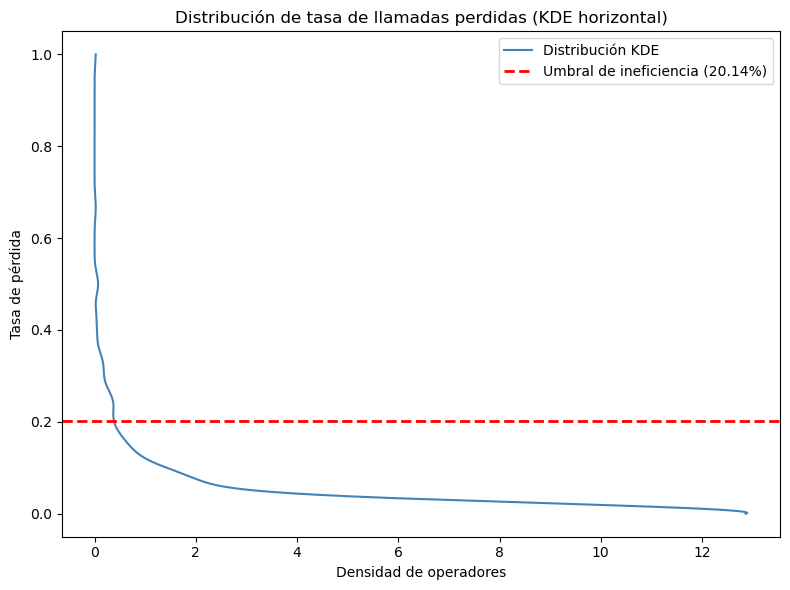

Operadores ineficientes: 38


In [56]:
# Copia de df
llamadas_entrantes = llamadas_entrantes.copy()


# Conversión segura desde categoría a booleano
llamadas_entrantes['missed_call'] = llamadas_entrantes['missed_call'].astype('bool')

## Alta proporcion de llamadas entrantes perdidas
llamadas_entrantes_operador = llamadas_entrantes.groupby('operator_id')['missed_call'].sum()
total_por_operador = llamadas_entrantes.groupby('operator_id').size()
tasa_perdida = (llamadas_entrantes_operador / total_por_operador).fillna(0)

print(tasa_perdida.describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))
umbral_tasa_perdida = 0.2014

# Grafica
from scipy.stats import gaussian_kde
import numpy as np

# Preparar datos
y = tasa_perdida.values
kde = gaussian_kde(y)
y_vals = np.linspace(0, y.max(), 1000)
x_vals = kde(y_vals)

# Graficar KDE horizontal con línea roja en el umbral
plt.figure(figsize=(8,6))
plt.plot(x_vals, y_vals, color='steelblue', label='Distribución KDE')
plt.axhline(y=umbral_tasa_perdida, color='red', linestyle='--', linewidth=2, label='Umbral de ineficiencia (20.14%)')
plt.title('Distribución de tasa de llamadas perdidas (KDE horizontal)')
plt.xlabel('Densidad de operadores')
plt.ylabel('Tasa de pérdida')
plt.legend()
plt.tight_layout()
plt.show()

# Total de operadores ineficientes
print("Operadores ineficientes:", (tasa_perdida > umbral_tasa_perdida).sum())

*📊 Se evaluó la proporción de llamadas entrantes perdidas por operador. La mitad de los operadores no pierde llamadas, y el 95% mantiene una tasa de pérdida inferior al 20.14%. Se estableció este valor como umbral defensivo para identificar operadores con tasas de abandono anormalmente altas, alineado con el criterio de ineficiencia operativa.*
___

## ✅ Criterios de eficiencia
Se definieron tres criterios de eficiencia operativa con base en el análisis exploratorio, la revisión de valores atípicos y la distribución contextual de cada métrica. Los umbrales defensivos fueron establecidos mediante percentiles y visualizaciones, garantizando trazabilidad estadística y alineación con el modelo de negocio:

1. **Tiempos de espera prolongados en llamadas entrantes**  
   - Métrica: `wait_time`  
   - Umbral: **378 segundos** (percentil 95)  
   - Justificación: evita penalizar casos puntuales y captura operadores con demoras sistemáticas.  
   - Visualización: histograma con línea vertical en el umbral.

2. **Alta proporción de llamadas entrantes perdidas (internas y externas)**  
   - Métrica: tasa de pérdida = llamadas perdidas / llamadas entrantes  
   - Umbral: **20.14%** (percentil 95)  
   - Justificación: la mayoría de operadores tiene tasas cercanas a 0%; el umbral marca el límite superior aceptable.  
   - Visualización: curva de densidad horizontal con línea roja en el umbral.

3. **Bajo número de llamadas salientes**  
   - Métrica: volumen de llamadas salientes por operador  
   - Umbral: **21 llamadas** (percentil 50)  
   - Justificación: el negocio está orientado a llamadas salientes (69.4% del total); el umbral refleja actividad mínima esperada.  
   - Visualización: histograma con línea vertical en el umbral.
___

# 🔎5. Identificacion de operadores ineficaces

In [57]:
# Umbral de tiempo de espera
umbral_espera = 378 # Segundos(6.3 min aprox) percentil 95

# Umbral de proporcion de llamadas perdidas
umbral_tasa_perdida = 0.2014  # Percentil 95

# Umbral bajo numero de llamadas salientes
umbral_outgoing_calls = 21   # Percentil 50

In [70]:
def detectar_operadores_ineficientes(cmm, umbral_espera=378, umbral_tasa_perdida=0.2014, umbral_outgoing_calls=21):
    """
    Detecta operadores ineficientes según tres criterios:
    1. Tiempo de espera prolongado
    2. Alta tasa de llamadas entrantes perdidas
    3. Bajo volumen de llamadas salientes
    """

    # --- Criterio 1: Tiempo de espera prolongado ---
    llamadas_entrantes = cmm[cmm['direction'] == 'in'].copy()
    espera_por_operador = llamadas_entrantes.groupby('operator_id')['wait_time'].mean()
    criterio_espera = (espera_por_operador > umbral_espera).astype(bool)

    # --- Criterio 2: Alta tasa de llamadas perdidas ---
    llamadas_entrantes['missed_call'] = llamadas_entrantes['missed_call'].astype(bool)
    perdidas_por_operador = llamadas_entrantes.groupby('operator_id')['missed_call'].sum()
    total_entrantes_por_operador = llamadas_entrantes.groupby('operator_id').size()
    tasa_perdida = (perdidas_por_operador / total_entrantes_por_operador).fillna(0)
    criterio_perdida = (tasa_perdida > umbral_tasa_perdida).astype(bool)

    # --- Criterio 3: Bajo número de llamadas salientes ---
    llamadas_salientes = cmm[cmm['direction'] == 'out']
    volumen_saliente_por_operador = llamadas_salientes.groupby('operator_id').size()
    criterio_saliente = (volumen_saliente_por_operador < umbral_outgoing_calls).astype(bool)

    # --- Consolidar resultados ---
    todos_operadores = cmm['operator_id'].dropna().unique()
    df_resultado = pd.DataFrame(index=todos_operadores)

    df_resultado['espera_prolongada'] = criterio_espera.reindex(todos_operadores, fill_value=False)
    df_resultado['tasa_perdida_alta'] = criterio_perdida.reindex(todos_operadores, fill_value=False)
    df_resultado['actividad_saliente_baja'] = criterio_saliente.reindex(todos_operadores, fill_value=False)

    # Filtrar operadores que incumplen al menos un criterio
    operadores_ineficientes = df_resultado[df_resultado.any(axis=1)]

    return operadores_ineficientes

operadores_ineficientes = detectar_operadores_ineficientes(cmm, umbral_espera, umbral_tasa_perdida, umbral_outgoing_calls)

operadores_ineficientes

,espera_prolongada,tasa_perdida_alta,actividad_saliente_baja
880020,False,False,True
881278,False,False,True
882478,False,False,True
882688,False,False,True
880240,False,False,True
...,...,...,...
959596,False,False,True
952196,False,False,True
952916,False,False,True
959118,False,False,True


criterios_incumplidos
1    447
2     18
3      2
Name: count, dtype: int64


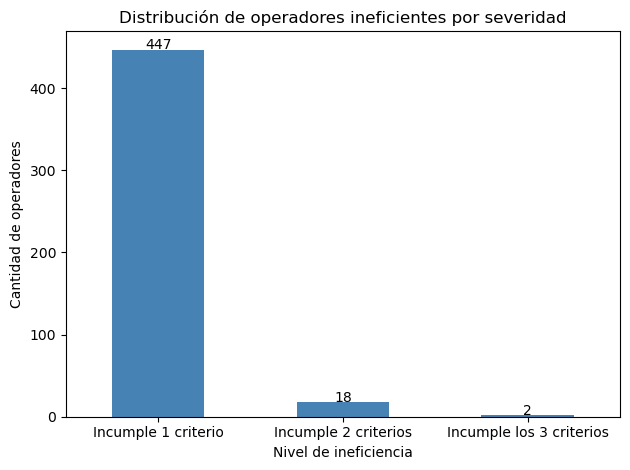

In [141]:
# Contar criterios incumplidos por operador
criterios = ['espera_prolongada', 'tasa_perdida_alta', 'actividad_saliente_baja']
operadores_ineficientes['criterios_incumplidos'] = operadores_ineficientes[criterios].sum(axis=1)

# Distribución agregada
conteo_por_nivel = operadores_ineficientes['criterios_incumplidos'].value_counts().sort_index()
print(conteo_por_nivel)

# Etiquetas narrativas
etiquetas = {
    1: 'Incumple 1 criterio',
    2: 'Incumple 2 criterios',
    3: 'Incumple los 3 criterios'
}
conteo_etiquetado = conteo_por_nivel.rename(index=etiquetas)

# Visualización
conteo_etiquetado.plot(kind='bar', color='steelblue')
plt.title('Distribución de operadores ineficientes por severidad')
plt.xlabel('Nivel de ineficiencia')
plt.ylabel('Cantidad de operadores')
plt.xticks(rotation=0)

# Agregamos totales a cada barra
for i in range(len(conteo_etiquetado)):
    plt.text(i, conteo_etiquetado.iloc[i] + 0.5, conteo_etiquetado.iloc[i], ha='center')

plt.tight_layout()
plt.show()



Total de operadores unicos ineficaces por umbrales:
Solo espera: 6
Solo pérdida: 22
Solo saliente: 419
Espera + Pérdida: 1
Espera + Saliente: 4
Pérdida + Saliente: 13
Los 3 criterios: 2
Total: 467


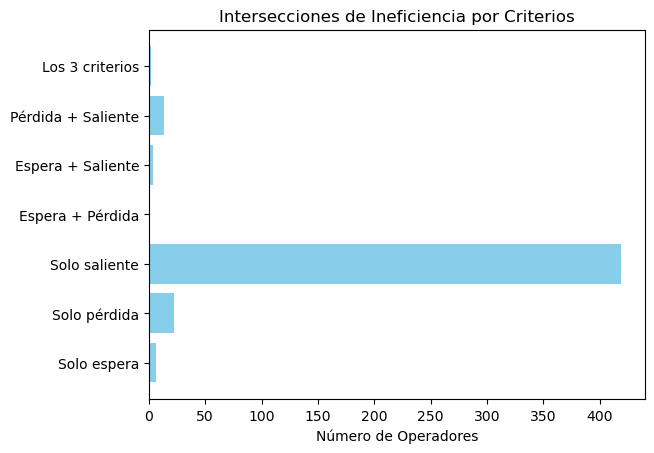

In [136]:
# Crear variables booleanas de cada criterio
espera = operadores_ineficientes["espera_prolongada"] == 1
perdida = operadores_ineficientes["tasa_perdida_alta"] == 1
saliente = operadores_ineficientes["actividad_saliente_baja"] == 1

# Calcular intersecciones
solo_espera = sum(espera & ~perdida & ~saliente)
solo_perdida = sum(~espera & perdida & ~saliente)
solo_saliente = sum(~espera & ~perdida & saliente)

espera_perdida = sum(espera & perdida & ~saliente)
espera_saliente = sum(espera & ~perdida & saliente)
perdida_saliente = sum(~espera & perdida & saliente)

los_tres = sum(espera & perdida & saliente)

# Mostramos cuantos operadores incumplieorn por umbrales y sus combinaciones
print('Total de operadores unicos ineficaces por umbrales:')
print("Solo espera:", solo_espera)
print("Solo pérdida:", solo_perdida)
print("Solo saliente:", solo_saliente)
print("Espera + Pérdida:", espera_perdida)
print("Espera + Saliente:", espera_saliente)
print("Pérdida + Saliente:", perdida_saliente)
print("Los 3 criterios:", los_tres)
print('Total:', solo_espera+solo_perdida+solo_saliente+espera_perdida+espera_saliente+perdida_saliente+los_tres)

# Graficamos intersecciones grafico barras
import matplotlib.pyplot as plt

labels = [
    "Solo espera",
    "Solo pérdida",
    "Solo saliente",
    "Espera + Pérdida",
    "Espera + Saliente",
    "Pérdida + Saliente",
    "Los 3 criterios"
]
valores = [
    solo_espera,
    solo_perdida,
    solo_saliente,
    espera_perdida,
    espera_saliente,
    perdida_saliente,
    los_tres
]

plt.barh(labels, valores, color='skyblue')
plt.xlabel('Número de Operadores')
plt.title('Intersecciones de Ineficiencia por Criterios')
plt.show()


In [128]:
combinaciones = operadores_ineficientes.groupby(criterios).size().reset_index(name='count')
combinaciones.sort_values('count', ascending=False, inplace=True)
print(combinaciones)

# Sacamos cuantos Operadores incumplieron en cada criterio
incumplimientos_por_criterio = operadores_ineficientes[criterios].sum().reset_index(name='count')
incumplimientos_por_criterio.sort_values('count', ascending=False, inplace=True)
print(f"\n{incumplimientos_por_criterio}")


   espera_prolongada  tasa_perdida_alta  actividad_saliente_baja  count
0              False              False                     True    419
1              False               True                    False     22
2              False               True                     True     13
3               True              False                    False      6
4               True              False                     True      4
6               True               True                     True      2
5               True               True                    False      1

                     index  count
2  actividad_saliente_baja    438
1        tasa_perdida_alta     38
0        espera_prolongada     13


In [73]:
# Relacionar operadores con clientes y sus planes
operadores_plan = cmm[['operator_id', 'client_id']].dropna().drop_duplicates()
clientes_con_plan = cmm[['client_id', 'plan']].dropna().drop_duplicates()

# Unir operadores con planes
operadores_planes = operadores_plan.merge(clientes_con_plan, on='client_id')

# Filtrar solo operadores ineficientes
operadores_ineficientes_con_plan = operadores_planes[
    operadores_planes['operator_id'].isin(operadores_ineficientes.index)
]

plan
B    195
C    151
A    121
Name: count, dtype: int64


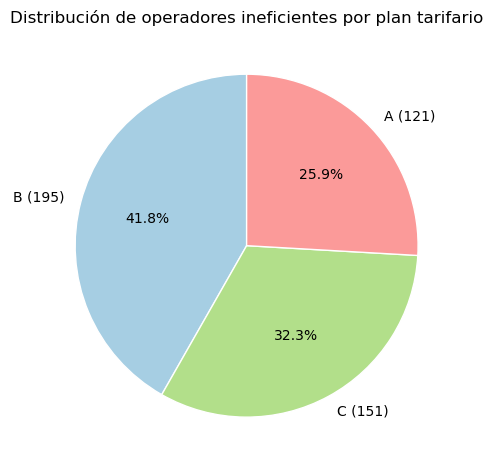

In [74]:
# Obtener operadores ineficientes únicos por plan
operadores_por_plan = operadores_ineficientes_con_plan[['operator_id', 'plan']].drop_duplicates()
conteo_operadores_por_plan = operadores_por_plan['plan'].value_counts()
print(conteo_operadores_por_plan)

# Grafico de pastel
# Pie chart con etiquetas enriquecidas
labels = [f'{plan} ({count})' for plan, count in conteo_operadores_por_plan.items()]
colors = ['#A6CEE3', '#B2DF8A', '#FB9A99']  # Paleta suave

conteo_operadores_por_plan.plot(
    kind='pie',
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white'}
)

plt.title('Distribución de operadores ineficientes por plan tarifario')
plt.ylabel('')
plt.tight_layout()
plt.show()


In [79]:
# Agregar criterios al DataFrame de operadores con plan
operadores_por_plan = operadores_ineficientes_con_plan[['operator_id', 'plan']].drop_duplicates()
operadores_por_plan = operadores_por_plan.merge(
    operadores_ineficientes[criterios],
    left_on='operator_id',
    right_index=True
)

# Agrupar por plan y sumar criterios incumplidos
conteo_por_criterio_y_plan = operadores_por_plan.groupby('plan', observed=True)[criterios].sum()


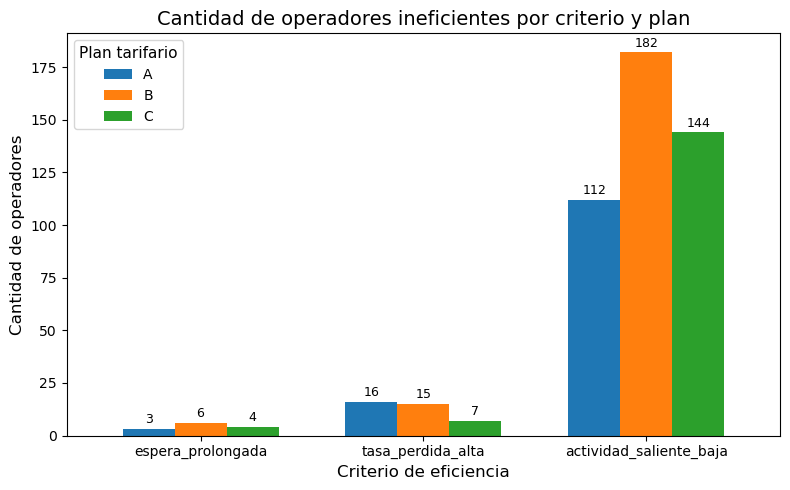

In [80]:
# Transponer para que cada fila sea un criterio
df_plot = conteo_por_criterio_y_plan.T

# Crear gráfico de barras agrupadas
ax = df_plot.plot(kind='bar', figsize=(8, 5), width=0.7)

# Agregamos etiquetas numericas a barras
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9, padding=2)

# Personalizar
plt.title('Cantidad de operadores ineficientes por criterio y plan', fontsize=14)
plt.xlabel('Criterio de eficiencia', fontsize=12)
plt.ylabel('Cantidad de operadores', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Plan tarifario', fontsize=10, title_fontsize=11)
plt.tight_layout()
plt.show()

## 🍰Proporcion de ineficiencias por plan

In [ ]:
# Operadores unicos por plan(total)
operadores_por_plan_total = operadores_planes[['operator_id', 'plan']].drop_duplicates()
total_operadores_por_plan = operadores_por_plan_total.groupby('plan', observed=True).size()

# Operadores ineficientes por plan
ineficientes_por_plan = operadores_ineficientes_con_plan[['operator_id', 'plan']].drop_duplicates().groupby('plan', observed=True).size()

# Porcentaje de ineficiencia
porcentaje_ineficiencia = (ineficientes_por_plan / total_operadores_por_plan * 100).round(2)

resumen_ineficiencia = pd.DataFrame({
    'Total operadores': total_operadores_por_plan,
    'Ineficientes': ineficientes_por_plan,
    '% Ineficiencia': porcentaje_ineficiencia
})
print(resumen_ineficiencia.reset_index().to_string(index=False))


plan  Total operadores  Ineficientes  % Ineficiencia
   A               310           121           39.03
   B               395           195           49.37
   C               387           151           39.02


## 🧑‍💻 Resumen

Se aplicaron tres criterios defensivos para detectar operadores ineficientes:

- **Tiempo de espera prolongado** (> 378 seg, percentil 95)
- **Alta tasa de llamadas perdidas** (> 20.14%, percentil 95)
- **Bajo volumen de llamadas salientes** (< 21 llamadas, percentil 50)

### 📌 Resultados clave

- **467 operadores** incumplen al menos un criterio.
- Severidad:
  - 447 incumplen 1 criterio
  - 18 incumplen 2 criterios
  - 2 incumplen los 3 criterios
- Combinación más frecuente: baja actividad saliente (419 casos)

### 📊 Segmentación por plan tarifario

- Distribución absoluta:
  - Plan B: 195 operadores (41.8%)
  - Plan C: 151 operadores (32.3%)
  - Plan A: 121 operadores (25.9%)

- Proporción relativa:
  - Plan B: 49.37% ineficiencia
  - Plan A: 39.03%
  - Plan C: 39.02%

### 📈 Visualizaciones incluidas

- KDE de tasa de pérdida
- Gráfico de severidad por criterios
- Pie chart por plan
- Barras por criterio y plan
- Tabla resumen de ineficiencia relativa

### ✅ Conclusión

El plan B presenta el mayor volumen y proporción de operadores ineficientes, con predominancia del criterio de baja actividad saliente. La segmentación por severidad y plan permite priorizar intervenciones operativas con base en impacto proporcional.
____


# ⚗️Hipotesis y comprobaciones
En base a los resultados obtenidos durante el analisis, se pensaron hipotesis a comprobar para reforzar los resultados de el analisis previo.
____
## 1️⃣Hipotesis - Duracion de llamadas promedio(salientes)
Se busca determinar si los operadores ineficientes tienen una **duracion promedio de llamadas salientes** significativamente menor que los operadores eficientes.
___
### 📋 Formulación de hipótesis
- **$H_0$ (nula):** No hay diferencia significativa en la duración promedio de llamadas salientes entre operadores eficientes e ineficientes.

- **$H_1$ (alternativa):** Los operadores ineficientes tienen una duración promedio de llamadas salientes significativamente menor.
____
### 🛠️ Prueba t-test

In [123]:
from scipy.stats import ttest_ind

# Filtrar llamadas salientes con operador válido
call_outgoing = cmm[(cmm['direction'] == 'out') & (cmm['operator_id'].notna())].copy()

# Clasificar operadores como eficientes o ineficientes
call_outgoing['grupo'] = call_outgoing['operator_id'].apply(
    lambda x: 'ineficiente' if x in operadores_ineficientes.index else 'eficiente'
)

# Agrupar por grupo
duraciones_ineficientes = call_outgoing[call_outgoing['grupo'] == 'ineficiente']['talk_time']
duraciones_eficientes = call_outgoing[call_outgoing['grupo'] == 'eficiente']['talk_time']

# Prueba t-test (asumiendo varianzas iguales)
t_stat, p_value = ttest_ind(duraciones_ineficientes, duraciones_eficientes, equal_var=True)

# Resultados
print(f'T-statistic: {t_stat:.4f}')
print(f'P-value: {p_value:.90f}')

# Interpretación
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: hay una diferencia significativa entre los grupos.")
else:
    print("No se rechaza la hipótesis nula: no hay una diferencia significativa entre los grupos.")


T-statistic: 19.9566
P-value: 0.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000457
Se rechaza la hipótesis nula: hay una diferencia significativa entre los grupos.


### 📊Resultados
 Se aplicó una **prueba t-test** para comparar la duración promedio de llamadas salientes entre operadores eficientes e ineficientes. Esta prueba fue elegida por tratarse de dos grupos independientes y una variable continua (duración), con el objetivo de determinar si la diferencia observada es estadísticamente significativa.

El resultado fue altamente significativo, lo que permite rechazar la hipótesis nula y concluir que los operadores ineficientes presentan un desempeño inferior en términos de tiempo de conversación. 

Esto refuerza la validez del criterio de baja actividad saliente como indicador de ineficiencia operativa.
___


## 2️⃣Hipótesis: ¿La tasa de llamadas perdidas es significativamente mayor en operadores ineficientes?

Se busca determinar si la tasa de llamadas perdidas entre el grupo de operadores eficientes e ineficientes es significativo.

In [108]:
# Calculamos tasa de llamadas perdidas por operador
call_incoming = cmm[(cmm['direction'] == 'in') & (cmm['operator_id'].notna())].copy()
call_incoming['missed_call'] = call_incoming['missed_call'].astype('bool')

# Calculamos tasa de llamadas perdidas por operador
tasa_perdidas_por_operador = call_incoming.groupby('operator_id')['missed_call'].sum()
total_por_operador = call_incoming.groupby('operator_id').size()
lost_rate = (tasa_perdidas_por_operador / total_por_operador).fillna(0)

# Clasificacion de operadores
grupo = lost_rate.index.to_series().apply(
    lambda x: 'ineficiente' if x in operadores_ineficientes.index else 'eficiente'
)

# Separacion grupal
tasa_ineficientes = lost_rate[grupo=='ineficiente']
tasa_eficientes = lost_rate[grupo=='eficiente']


In [109]:
# verificamos normalidad Shapiro-Wilk
from scipy.stats import shapiro as sh

# Prueba de normalidad
stat_inef, p_inef = sh(tasa_ineficientes)
stat_ef, p_ef = sh(tasa_eficientes)

print(f'Operadores ineficientes - Stat: {stat_inef:.4f}, P-value: {p_inef:.4f}')
print(f'Operadores eficientes - Stat: {stat_ef:.4f}, P-value: {p_ef:.4f}')

# Interpretacion(si p value < 0.05, no normal = Mann-Whitney, si normal = t-test)

if p_inef < 0.05:
    print("Operadores ineficientes: No se puede asumir normalidad (Mann-Whitney)")
else:
    print("Operadores ineficientes: Se puede asumir normalidad (t-test)")



Operadores ineficientes - Stat: 0.5513, P-value: 0.0000
Operadores eficientes - Stat: 0.6358, P-value: 0.0000
Operadores ineficientes: No se puede asumir normalidad (Mann-Whitney)


### 📋 Formulación
- **$H_0$ (nula):** No hay diferencia significativa en la tasa de llamadas perdidas entre operadores eficientes e ineficientes.

- **$H_1$ (alternativa):** Los operadores ineficientes tienen una tasa de llamadas perdidas significativamente mayor.
___

### 🛠️Prueba Mann-Whitney U

In [110]:
from scipy.stats import mannwhitneyu as mwu

# Ejecutamos prueba
stat, p_value = mwu(tasa_ineficientes, tasa_eficientes, alternative='greater')

# Mostramos resultados
print(f'U-statistic: {stat:.4f}, P-value: {p_value:.4f}')

# Interpretacion
if p_value < 0.05:
    print("Rechazamos la hipótesis nula: hay evidencia suficiente para afirmar que la tasa de ineficiencia es mayor que la de eficiencia.")
else:
    print("No rechazamos la hipótesis nula: no hay evidencia suficiente para afirmar que la tasa de ineficiencia es mayor que la de eficiencia.")


U-statistic: 67792.5000, P-value: 0.2340
No rechazamos la hipótesis nula: no hay evidencia suficiente para afirmar que la tasa de ineficiencia es mayor que la de eficiencia.


### 📊Resultados
 Se comparó la tasa de llamadas perdidas entre operadores eficientes e ineficientes usando la **prueba estadística Mann-Whitney U**. Esta prueba se eligió porque los datos no siguen una distribución normal, lo cual se verificó previamente con la prueba de **Shapiro-Wilk**.

El resultado mostró que no hay una diferencia estadísticamente significativa entre ambos grupos (p = 0.234). Es decir, aunque algunos operadores ineficientes tienen tasas altas de llamadas perdidas, como grupo no se distinguen claramente de los eficientes en esta métrica.

Esto no invalida el criterio de tasa de pérdida como parte del modelo de clasificación, pero indica que no es el principal factor que separa a los grupos cuando se analiza de forma agregada.

____

## 3️⃣Hipótesis: Distribución de ineficiencia por plan

Se busca determinar si existe una diferencia significativa de ineficacia entre planes(A, B y C)
___
### 📋Formulación
- **$H_0$ (nula):** La proporción de operadores ineficientes es igual entre los distintos planes tarifarios.

- **$H_1$ (alternativa):** Al menos un plan tiene una proporción de operadores ineficientes significativamente diferente.
___

### 🛠️ Prueba Chi-cuadrado

In [112]:
from scipy.stats import chi2_contingency as chi2

# Clasificamos operadores - eficientes o ineficientes
all_operators = operadores_planes[['operator_id', 'plan']].drop_duplicates()
all_operators['ineficiente'] = all_operators['operator_id'].isin(operadores_ineficientes.index)

# Tabla de contingencia
contingency_table = pd.crosstab(all_operators['plan'], all_operators['ineficiente'])

# Prueba chi2
chi2, p_value, dof, expected = chi2(contingency_table)

# Resultados
print("Tabla de Resultados")
print(contingency_table)
print(f'\nChi2: {chi2:.4f}, P-value: {p_value:.4f}, Grados de libertad: {dof}')

# Interpretacion
alpha = 0.05

if p_value < alpha:
    print("Rechazamos la hipótesis nula: hay evidencia suficiente para afirmar que la tasa de ineficiencia es mayor que la de eficiencia.")
else:
    print("No rechazamos la hipótesis nula: no hay evidencia suficiente para afirmar que la tasa de ineficiencia es mayor que la de eficiencia.")


Tabla de Resultados
ineficiente  False  True 
plan                     
A              189    121
B              200    195
C              236    151

Chi2: 11.0185, P-value: 0.0040, Grados de libertad: 2
Rechazamos la hipótesis nula: hay evidencia suficiente para afirmar que la tasa de ineficiencia es mayor que la de eficiencia.


### 📊Resultados
 Se aplicó la **prueba Chi-cuadrado** de independencia para evaluar si la proporción de operadores ineficientes varía entre planes tarifarios. La tabla de contingencia mostró diferencias visibles, y el resultado fue estadísticamente significativo (p = 0.004).

Esto indica que la ineficiencia no está distribuida de forma uniforme entre los planes. En particular, el plan B presenta una proporción significativamente mayor de operadores ineficientes, lo que refuerza la necesidad de priorizar acciones correctivas en ese segmento.

📌 Se utilizó la **prueba Chi-cuadrado** de independencia porque permite evaluar si existe una relación significativa entre dos variables categóricas: el plan tarifario y la condición de eficiencia del operador. Esta prueba es adecuada cuando se trabaja con conteos en tablas de contingencia.
___


## 4️⃣Hipótesis: Severidad de ineficiencia por plan
Se busca determinar si el numero de parametros incumplidos es similar entre tipo de plan.
___

### 📋 Formulación
- **$H_0$ (nula):** La severidad de ineficiencia (número de criterios incumplidos) es similar entre los planes tarifarios.

- **$H_1$ (alternativa):** Al menos un plan presenta una severidad significativamente diferente.
___
### Prueba Kruskal-Wallis

In [ ]:
from scipy.stats import kruskal as kkal

# Columna de suma de criterios
operadores_ineficientes['criterios_incumplidos'] = operadores_ineficientes[criterios].sum(axis=1).copy()

# Relacion operadores ineficientes-planes
op_risk = operadores_ineficientes[['criterios_incumplidos']].copy()
op_risk = op_risk.merge(operadores_planes[['operator_id', 'plan']], left_index=True, right_on='operator_id')

# Agrupamos por risk plan
grupo_A = op_risk[op_risk['plan'] == 'A']['criterios_incumplidos']
grupo_B = op_risk[op_risk['plan'] == 'B']['criterios_incumplidos']
grupo_C = op_risk[op_risk['plan'] == 'C']['criterios_incumplidos']

# Ejecutamos prueba
stat, p_value = kkal(grupo_A, grupo_B, grupo_C)

# Mostramos resultados
print(f'Kruskal-Wallis H-statistic: {stat:.4f}, P-value: {p_value:.4f}')

# Interpretación
alpha = 0.05

if p_value < alpha:
    print("La severidad de ineficiencia varía entre planes.")
else:
    print("La severidad de ineficiencia es similar en todos los planes.")



### 📊Resultados 
Se evaluó si la severidad de ineficiencia —medida como la cantidad de criterios incumplidos por operador— varía entre los planes tarifarios. Esta hipótesis se planteó para complementar el análisis de proporción de ineficiencia por plan, buscando identificar si ciertos planes concentran operadores con mayor nivel de incumplimiento.

Se utilizó la **prueba Kruskal-Wallis** por tratarse de una variable ordinal (1, 2 o 3 criterios incumplidos) y grupos independientes (planes A, B y C), sin asumir distribución normal. Esta prueba es adecuada para comparar la distribución de una variable entre más de dos grupos cuando no se cumplen los supuestos del ANOVA.

El resultado no fue estadísticamente significativo (p = 0.263), lo que indica que la severidad de ineficiencia está distribuida de forma similar entre los planes. Aunque el plan B presenta mayor volumen y proporción de operadores ineficientes, la intensidad del incumplimiento no varía significativamente entre planes.

📌 **Nota metodológica: ¿Por qué se utilizó Kruskal-Wallis en lugar de ANOVA?**

La prueba ANOVA requiere que se cumplan tres supuestos fundamentales:

1. **Normalidad**: Cada grupo debe tener una distribución aproximadamente normal.  
   → En este caso, la variable `criterios_incumplidos` toma valores discretos (1, 2 o 3), lo que no permite asumir normalidad en ninguno de los grupos.

2. **Homogeneidad de varianzas**: Las varianzas entre los grupos deben ser similares.  
   → Dado que los valores posibles son limitados y la distribución por plan es desigual, no se puede garantizar este supuesto.

3. **Independencia de observaciones**: Los datos deben ser independientes entre sí.  
   → Este supuesto sí se cumple, ya que cada operador representa una observación única y no hay duplicados.

Por lo tanto, se optó por la prueba **Kruskal-Wallis**, que es una alternativa no paramétrica adecuada para comparar distribuciones entre más de dos grupos cuando no se cumplen los supuestos del ANOVA. Esta decisión garantiza que el análisis sea estadísticamente válido y defensivo.

___


# 🔰Conclusiones y recomendaciones

## 📌 Hallazgos clave

- La operación está fuertemente orientada a llamadas **salientes** (69.4%) y **externas** (87.3%), lo que justifica el uso del **percentil 50** como umbral defensivo para detectar baja actividad saliente.
- El **34% de las llamadas entrantes no son atendidas**, lo que representa una oportunidad crítica de mejora en atención.
- El plan tarifario **B concentra el mayor volumen de operadores (34.8%) y clientes únicos (54.1%)**, lo que lo convierte en el segmento más representativo del negocio.
- Se identificaron **467 operadores ineficientes** mediante tres criterios defensivos:
  - Tiempo de espera prolongado (> 378 seg, percentil 95)
  - Alta tasa de llamadas perdidas (> 20.14%, percentil 95)
  - Bajo volumen de llamadas salientes (< 21 llamadas, percentil 50)
- La **ineficiencia está dominada por baja actividad saliente** (419 casos), lo que sugiere falta de proactividad o asignación inadecuada de tareas.
- La mayoría de los operadores ineficientes **incumplen solo un criterio** (447 casos), lo que indica que el problema es focalizado y potencialmente reversible.
- El plan **B presenta la mayor proporción de ineficiencia (49.37%)**, significativamente superior a los planes A y C (~39%), como se confirmó mediante la prueba **Chi-cuadrado**.
- No se encontraron diferencias significativas en la **severidad de ineficiencia** entre planes (Kruskal-Wallis), lo que indica que el nivel de incumplimiento es similar en todos los segmentos.

---

## ✅ Recomendaciones prácticas

1. **Focalizar acciones correctivas en el plan B**, que concentra tanto el mayor volumen como la mayor proporción de operadores ineficientes.
   - Revisión de asignación de operadores.
   - Reentrenamiento en gestión de llamadas salientes.
   - Evaluación de carga operativa y distribución de clientes.

2. **Implementar monitoreo proactivo de actividad saliente**, dado que es el criterio más incumplido.
   - Alertas por bajo volumen semanal.
   - Incentivos por actividad sostenida.

3. **Revisar causas de llamadas perdidas**, especialmente en operadores con alto volumen entrante.
   - Redistribuir horarios o reforzar cobertura en franjas críticas.

4. **Segmentar intervenciones según severidad**, priorizando operadores que incumplen 2 o más criterios (20 casos).
   - Diagnóstico individual.
   - Plan de mejora personalizado.

5. **Reforzar análisis continuo por plan**, incorporando métricas de desempeño y evolución post-intervención.



____
# 📚 Fuentes consultadas

A continuación se listan las principales fuentes utilizadas durante el desarrollo del análisis, junto con las preguntas que ayudaron a responder:

---

### 🔧 Visualización y estimación de densidades

- **`sns.countplot` – Seaborn**  
  ¿Cómo visualizar la distribución de operadores por categoría o plan?  
  [Documentación oficial](https://seaborn.pydata.org/generated/seaborn.countplot.html)

- **`scipy.stats.gaussian_kde`**  
  ¿Cómo estimar la densidad de la tasa de llamadas perdidas y definir umbrales defensivos?  
  [Referencia de SciPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html)

---

### 📊 Pruebas estadísticas aplicadas

- **`scipy.stats.ttest_ind`**  
  ¿Existe diferencia significativa en la duración promedio de llamadas entre operadores eficientes e ineficientes?  
  [Documentación](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)

- **`scipy.stats.shapiro`**  
  ¿La variable sigue distribución normal? ¿Qué prueba aplicar según su distribución?  
  [Referencia Shapiro-Wilk](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html)

- **`scipy.stats.mannwhitneyu`**  
  ¿Qué prueba usar si la variable no es normal? ¿Cómo comparar tasas de pérdida entre grupos?  
  [Referencia Mann-Whitney U](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html)

- **`scipy.stats.chi2_contingency`**  
  ¿Existe diferencia significativa en la proporción de operadores ineficientes entre planes tarifarios?  
  [Chi² test de independencia](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html)

- **`scipy.stats.kruskal`**  
  ¿La severidad de ineficiencia (número de criterios incumplidos) varía entre planes?  
  [Kruskal-Wallis test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html)

---

### 📐 Fundamento metodológico

- **ANOVA vs Kruskal-Wallis – StackExchange & FasterCapital**  
  ¿Cuándo usar pruebas no paramétricas como Kruskal-Wallis en lugar de ANOVA?  
  [Comparación de pruebas](https://stats.stackexchange.com/questions/76059/difference-between-anova-and-kruskal-wallis-test)

---

### 📞 Métricas operativas en call centers

- **Zendesk – Métrica Tiempo de Conversación en llamada**  
  ¿Qué métrica de tiempo se utiliza en la medición de llamadas?  
  [Medición de llamadas](https://support.zendesk.com/hc/es/articles/4408846723994--La-m%C3%A9trica-Tiempo-de-conversaci%C3%B3n-de-llamada-se-cuenta-en-segundos-o-minutos)

- **Forbes Advisor – Call Center KPIs**  
  ¿Cómo se mide la productividad y eficiencia de operadores en entornos reales de atención telefónica?  
  [Call center metrics](https://www.forbes.com/advisor/business/software/call-center-metrics/)

- **KrispCall & RingCentral – Indicadores de desempeño**  
  ¿Qué indicadores se usan para evaluar tiempos de espera, calidad de servicio y eficacia operativa?  
  [Indicadores clave](https://krispcall.com/call-contact-center/call-center-metrics/)

